In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [0]:
uploaded=files.upload()

In [49]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      csv_reader = csv.reader(training_file, delimiter=',')
      
      #skip the header line
      next(csv_reader)

      #instantiating empty list variables for the reader
      temp_labels = []
      temp_images = []

      #reading each row in the csv data file
      for row in csv_reader:
        #adding the first column in the data file into the list variable
        temp_labels.append(row[0])
        #read in the image data into a variable
        image = row[1:785]
        #split the image array into a 28x28 np array
        split_image=np.array_split(image,28)
        #adding the splitted image values to the array.
        temp_images.append(split_image)

      #coverting the label data into a numpy float array    
      labels = np.array(temp_labels).astype('float')
      #coverting the image data into a numpy float array
      images = np.array(temp_images).astype('float')
    return images, labels

#calling the function to load the data from the CSV's into each training and test variables for the label and image values
training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

#printing the shape of the variables
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)


# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [50]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims


  #expanding the array dimensions so they can be fed into the CNN.
training_images = np.expand_dims(training_images, axis=4)
testing_images = np.expand_dims(testing_images, axis=4)

  #defining the image data generator for the training set with augmentation
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip = True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
    )

  #defining the image data generator for the test set
validation_datagen = ImageDataGenerator(
    rescale=1/255
    )
    
  #checking shape after expanding
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
  #building the CNN with 2 convolutions and poolings. 
  #flatten after CNNs, and using softmax to predict the one of the 26 "signs" as an output
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(26,activation='softmax')])

  #compiling the neural net - using ADAM and categorical crossentropy.
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  #using the image generator to pull the data from the files in batches of 32
training_generator = train_datagen.flow(training_images,training_labels,batch_size=32)
validation_generator = validation_datagen.flow(testing_images,testing_labels,batch_size=32)

 #executing the model for 15 epochs
history = model.fit_generator(training_generator, validation_data=validation_generator,epochs=15)


model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
#[6.92426086682151, 0.56609035]


Epoch 1/15
858/858 [==============================] - 65s 76ms/step - loss: 2.7572 - acc: 0.1592 - val_loss: 1.9423 - val_acc: 0.3606
Epoch 2/15
858/858 [==============================] - 65s 76ms/step - loss: 1.9933 - acc: 0.3675 - val_loss: 1.3186 - val_acc: 0.5498
Epoch 3/15
858/858 [==============================] - 65s 75ms/step - loss: 1.6150 - acc: 0.4829 - val_loss: 0.9920 - val_acc: 0.6686
Epoch 4/15
858/858 [==============================] - 65s 76ms/step - loss: 1.3839 - acc: 0.5493 - val_loss: 0.7855 - val_acc: 0.7448
Epoch 5/15
858/858 [==============================] - 63s 74ms/step - loss: 1.2306 - acc: 0.5964 - val_loss: 0.6823 - val_acc: 0.7672
Epoch 6/15
858/858 [==============================] - 64s 75ms/step - loss: 1.1079 - acc: 0.6365 - val_loss: 0.6966 - val_acc: 0.7547
Epoch 7/15
858/858 [==============================] - 64s 75ms/step - loss: 1.0093 - acc: 0.6686 - val_loss: 0.5294 - val_acc: 0.8066
Epoch 8/15
858/858 [==============================] - 65s 75ms

[165.76954238985215, 0.7066369]

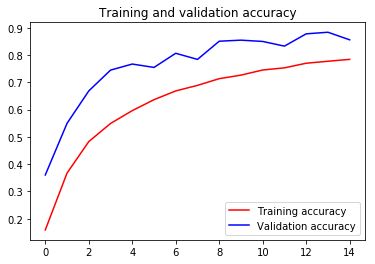

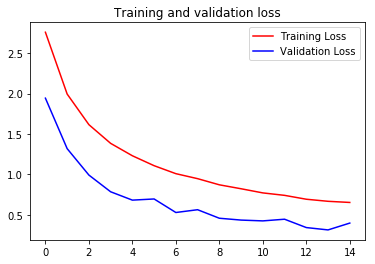

In [52]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()